<a href="https://colab.research.google.com/github/nderitugichuki/Loan-Default-Prediction/blob/main/Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Loan_default.csv')

# Data Overview

In [ ]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0.0
1,HPSK72WA7R,69,50432,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,Master's,Full-time,Married,No,No,Other,Yes,0.0
2,C1OZ6DPJ8Y,46,84208,129188.0,451.0,26.0,3.0,21.17,24.0,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1.0
3,V2KKSFM3UN,32,31713,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,High School,Full-time,Married,No,No,Business,No,0.0
4,EY08JDHTZP,60,20437,9139.0,633.0,8.0,4.0,6.51,48.0,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0.0


In [ ]:
df.shape

(247967, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247967 entries, 0 to 247966
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          247967 non-null  object 
 1   Age             247967 non-null  int64  
 2   Income          247967 non-null  int64  
 3   LoanAmount      247966 non-null  float64
 4   CreditScore     247966 non-null  float64
 5   MonthsEmployed  247966 non-null  float64
 6   NumCreditLines  247966 non-null  float64
 7   InterestRate    247966 non-null  float64
 8   LoanTerm        247966 non-null  float64
 9   DTIRatio        247966 non-null  float64
 10  Education       247966 non-null  object 
 11  EmploymentType  247966 non-null  object 
 12  MaritalStatus   247966 non-null  object 
 13  HasMortgage     247966 non-null  object 
 14  HasDependents   247966 non-null  object 
 15  LoanPurpose     247966 non-null  object 
 16  HasCoSigner     247966 non-null  object 
 17  Default   

In [ ]:
df.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,1
CreditScore,1
MonthsEmployed,1
NumCreditLines,1
InterestRate,1
LoanTerm,1
DTIRatio,1


In [ ]:
df.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
247962,N4VZWQHL1E,46,121072,113183.0,619.0,119.0,1.0,20.38,60.0,0.62,High School,Part-time,Single,No,No,Education,No,0.0
247963,2G1K0F3LR4,18,110917,229828.0,352.0,44.0,3.0,4.19,36.0,0.60,Master's,Full-time,Single,No,Yes,Home,No,0.0
247964,E8MDC568YG,36,57228,196245.0,571.0,2.0,3.0,14.92,48.0,0.85,Master's,Part-time,Single,Yes,No,Auto,Yes,0.0
247965,5HSE10OOSO,56,99876,59641.0,620.0,42.0,2.0,4.53,48.0,0.50,High School,Unemployed,Divorced,Yes,Yes,Auto,No,0.0
247966,PDEQL2I2ZW,52,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(index=247966, inplace=True)


In [ ]:
df[df.duplicated()]

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default


# Descriptive Statistics

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,247966.0,43.495116,14.987371,18.0,31.00,43.00,56.00,69.0
Income,247966.0,82482.813273,38960.967720,15000.0,48821.25,82471.50,116194.75,149999.0
LoanAmount,247966.0,127576.958152,70843.331605,5000.0,66147.25,127525.00,188983.25,249999.0
CreditScore,247966.0,574.248381,158.883494,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,247966.0,59.538251,34.647177,0.0,30.00,60.00,90.00,119.0
NumCreditLines,247966.0,2.500879,1.116881,1.0,2.00,2.00,3.00,4.0
InterestRate,247966.0,13.495625,6.636582,2.0,7.78,13.46,19.25,25.0
LoanTerm,247966.0,36.022697,16.970017,12.0,24.00,36.00,48.00,60.0
DTIRatio,247966.0,0.500200,0.230935,0.1,0.30,0.50,0.70,0.9
Default,247966.0,0.116318,0.320607,0.0,0.00,0.00,0.00,1.0


# Visualization

**Age Distribution**

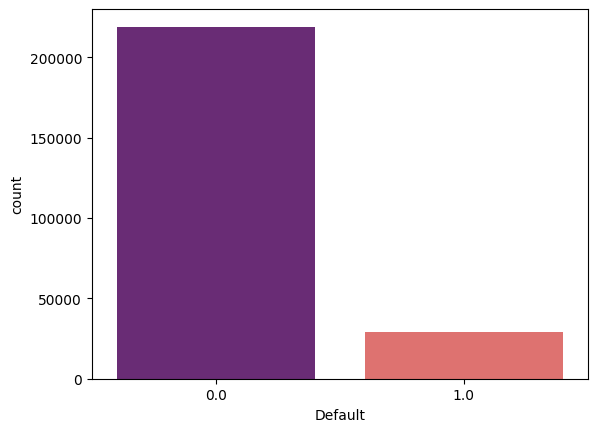

In [ ]:
sns.countplot(x = 'Default', data =df, palette = 'magma')
plt.show()

In [ ]:
df_num = df.select_dtypes(exclude = ['object']).drop(['Default','DTIRatio','LoanTerm'], axis = 1)

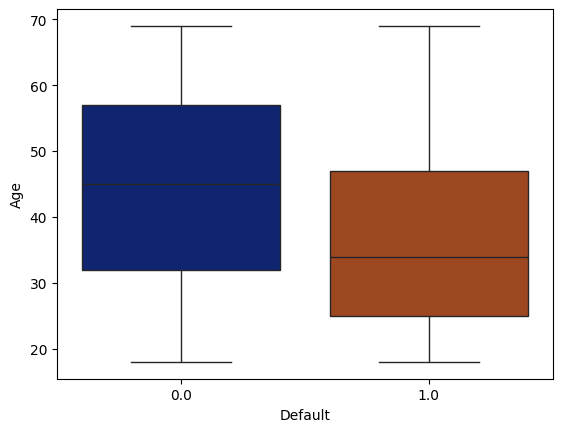

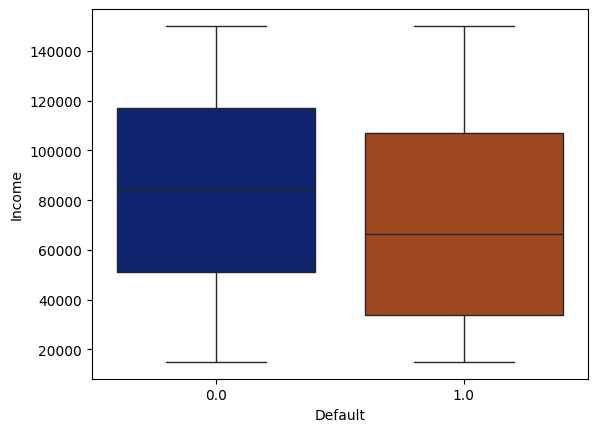

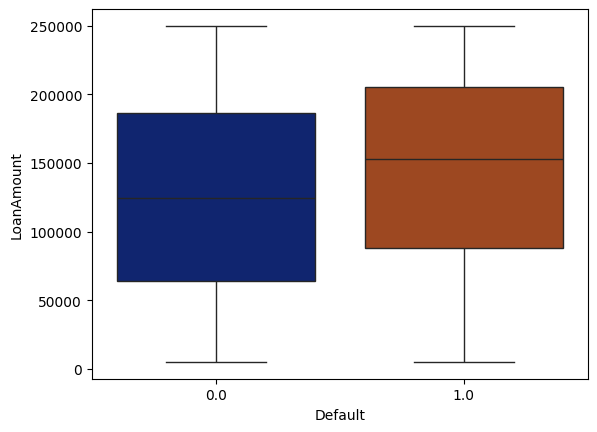

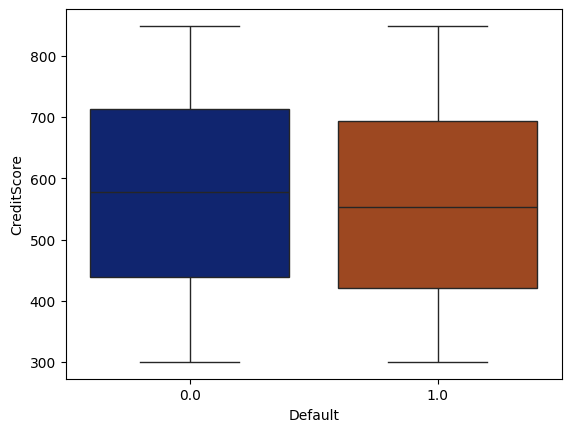

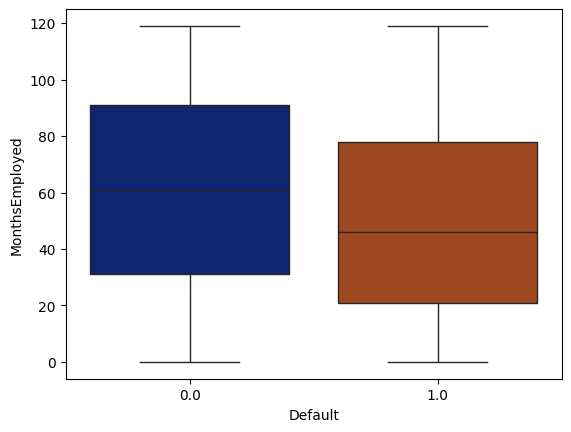

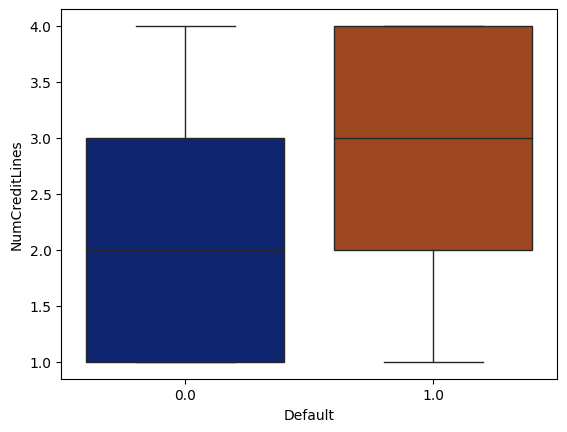

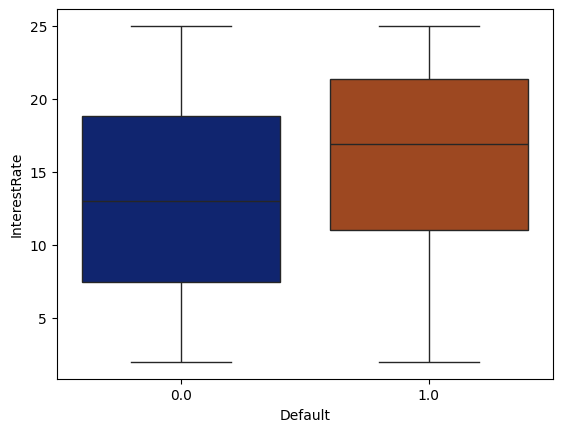

In [ ]:
for col in df_num:
    sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')
    plt.show()

# Interpretation

1. Older people are seen less likely to default

2. The dafaulters are seen with lower avg income

3. The dafaulters are seen with larger Loan Amount and lesser credit score

4. People having higher Interest rate are more likely to default

# Correlation

In [ ]:
df_num.corr()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
Age,1.000000,-0.001392,-0.001695,-0.000672,-0.000445,0.000083,-0.001202,0.000167,-0.004888,-0.167846
Income,-0.001392,1.000000,-0.000468,-0.001396,0.002539,-0.001849,-0.002620,-0.000732,-0.000167,-0.098934
LoanAmount,-0.001695,-0.000468,1.000000,0.000509,0.002722,0.000651,-0.001892,0.002535,0.001607,0.086918
CreditScore,-0.000672,-0.001396,0.000509,1.000000,0.000961,0.000458,0.000268,0.001081,-0.001097,-0.034271
MonthsEmployed,-0.000445,0.002539,0.002722,0.000961,1.000000,0.001687,0.000307,-0.000568,0.001940,-0.097520
NumCreditLines,0.000083,-0.001849,0.000651,0.000458,0.001687,1.000000,0.000437,-0.000781,-0.000599,0.028214
InterestRate,-0.001202,-0.002620,-0.001892,0.000268,0.000307,0.000437,1.000000,0.001439,0.000551,0.131345
LoanTerm,0.000167,-0.000732,0.002535,0.001081,-0.000568,-0.000781,0.001439,1.000000,0.001650,0.000787
DTIRatio,-0.004888,-0.000167,0.001607,-0.001097,0.001940,-0.000599,0.000551,0.001650,1.000000,0.019445
Default,-0.167846,-0.098934,0.086918,-0.034271,-0.097520,0.028214,0.131345,0.000787,0.019445,1.000000


<Axes: >

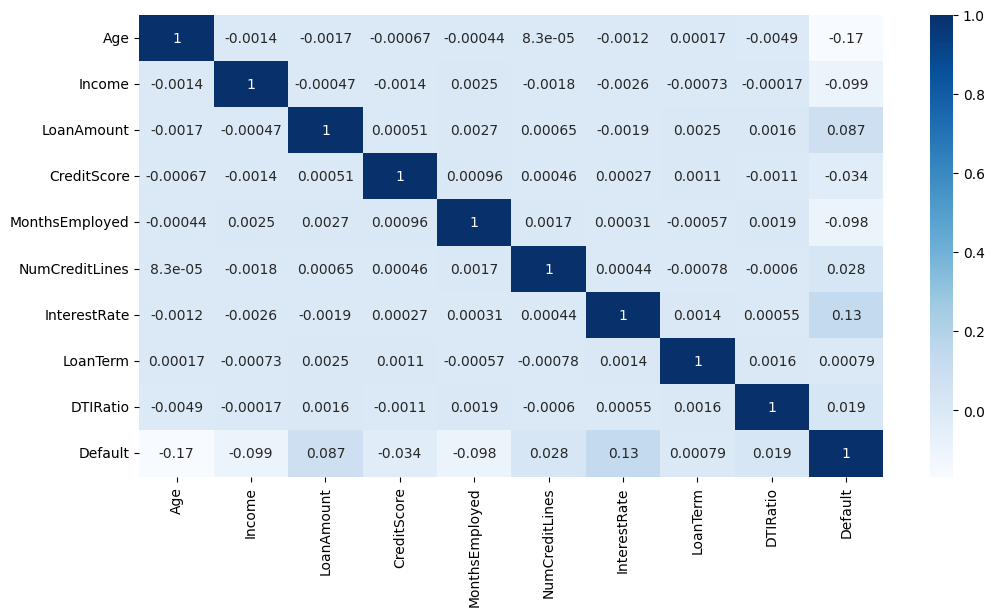

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(df_num.corr(), annot = True, cmap = 'Blues')

**No significant correlation found**

# **ScatterPlot**

<Axes: xlabel='Income', ylabel='LoanAmount'>

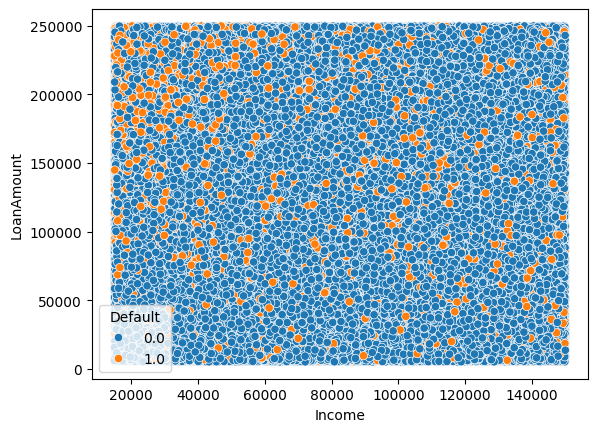

In [ ]:
sns.scatterplot( x = 'Income' , y = 'LoanAmount', data =df,hue = 'Default')

No as such relationship found , the defaulters are spread between both low and high income

# Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree

# Feature and target segregation

In [ ]:
# dropping Loan ID
df.drop('LoanID', axis = 1 , inplace = True)

In [ ]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0.0
1,69,50432,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,Master's,Full-time,Married,No,No,Other,Yes,0.0
2,46,84208,129188.0,451.0,26.0,3.0,21.17,24.0,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1.0
3,32,31713,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,High School,Full-time,Married,No,No,Business,No,0.0
4,60,20437,9139.0,633.0,8.0,4.0,6.51,48.0,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0.0


In [ ]:
x = df.drop('Default', axis = 1)
y = df['Default']

# Label Encoding

In [ ]:
# filtering only non numeric col
df_obj = df.select_dtypes(include=['object'])

In [ ]:
enc = LabelEncoder()
for col in df_obj:
    x[col] = enc.fit_transform(x[col])

Categorical(Textual) columns are now converted into Numerical data

In [ ]:
x.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,0,0,0,1,1,4,1
1,69,50432,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,2,0,1,0,0,4,1
2,46,84208,129188.0,451.0,26.0,3.0,21.17,24.0,0.31,2,3,0,1,1,0,0
3,32,31713,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,1,0,1,0,0,1,0
4,60,20437,9139.0,633.0,8.0,4.0,6.51,48.0,0.73,0,3,0,0,1,0,0


# Standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
x[x.columns] = scaler.fit_transform(x[x.columns])

In [ ]:
x.head(8)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,0.745098,0.525885,0.186070,0.400729,0.672269,1.000000,0.575217,0.50,0.4250,0.000000,0.0,0.0,1.0,1.0,1.00,1.0
1,1.000000,0.262461,0.487512,0.287796,0.126050,0.000000,0.122174,1.00,0.7250,0.666667,0.0,0.5,0.0,0.0,1.00,1.0
2,0.549020,0.512656,0.506892,0.275046,0.218487,0.666667,0.833478,0.25,0.2625,0.666667,1.0,0.0,1.0,1.0,0.00,0.0
3,0.274510,0.123801,0.162446,0.806922,0.000000,0.666667,0.220435,0.25,0.1625,0.333333,0.0,0.5,0.0,0.0,0.25,0.0
4,0.823529,0.040274,0.016894,0.606557,0.067227,1.000000,0.196087,0.75,0.7875,0.000000,1.0,0.0,0.0,1.0,0.00,0.0
5,0.137255,0.557767,0.348769,0.765027,0.151261,0.333333,0.900870,0.25,0.0000,0.333333,1.0,1.0,1.0,0.0,0.25,1.0
6,0.392157,0.712509,0.702146,0.234973,0.672269,0.000000,0.743913,0.00,0.0750,0.000000,1.0,1.0,1.0,0.0,0.75,1.0
7,0.745098,0.828169,0.614333,0.420765,0.563025,1.000000,0.267391,1.00,0.4125,1.000000,0.0,0.5,0.0,0.0,0.75,1.0


**Features are now standardized**

# Splitting the Data into train and test part

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape, x_test.shape

((198372, 16), (49594, 16))

# Fitting the training Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth = 4, random_state=1, criterion='entropy'),
    'Logistic Regression': LogisticRegression(random_state=1),
    'Random Forest': RandomForestClassifier(random_state=1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=1),
    'XGBoost': xgb.XGBClassifier(random_state=1)
}

# List to store model metrics
models_metrics = []

# Evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(x_train, y_train)

    # Predict on the test data
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate the metrics
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    auc = round(roc_auc_score(y_test, y_pred_proba), 4) if y_pred_proba is not None else 'N/A'

    # Append the metrics to the list
    models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall,
        "AUC": auc
    })

# Convert the results into a DataFrame for better visualization
metrics_df = pd.DataFrame(models_metrics)

# Print the results table
metrics_df

,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Decision Tree,0.8862,0.0943,0.5495,0.0516,0.7262
1,Logistic Regression,0.8871,0.0735,0.6435,0.0390,0.7472
2,Random Forest,0.8871,0.0880,0.6136,0.0474,0.7315
3,Gradient Boosting,0.8879,0.0965,0.6513,0.0521,0.7563
4,XGBoost,0.8869,0.1480,0.5509,0.0855,0.7448


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=1)
xgb_model.fit(x_train,y_train)
y_pred = xgb_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.88690164132758

In [ ]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

**Fitting Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

Classifier = LogisticRegression(random_state=1)
y_pred = Classifier.fit(x_train, y_train)


NameError: name 'x_train' is not defined

# Predictions

In [ ]:
y_pred = xgb_model.predict(x_test)

# Accuracy Evaluation

In [ ]:
accuracy_score(y_test,y_pred)

0.88690164132758

## Feature importance

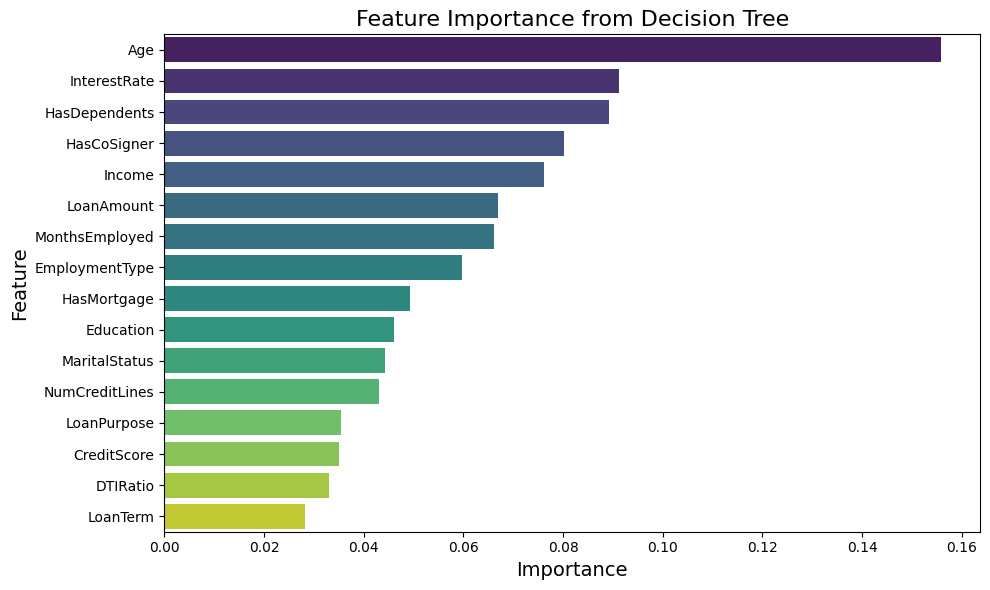

In [ ]:
# Get feature importances
feature_importances = xgb_model.feature_importances_

# Create a DataFrame for better visualization (assuming X_train has the feature names)
features = x_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')

# Add titles and labels
plt.title('Feature Importance from xgboost', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()


**Feature Importance Explanation**:
1.	Age (15.6%): Age is the most significant factor. Typically, older customers are more financially stable and less likely to default, while younger borrowers might face more uncertainty in their financial situations.
2.	Interest Rate (9.1%): Higher interest rates increase the monthly payment burden, making it harder for customers to keep up with payments, thus raising the risk of default.
3.	Has Dependents (8.9%): Customers with dependents often have higher financial obligations, which can increase the strain on their resources, making them more susceptible to defaulting on loans.
4.	Has Co-Signer (8.0%): Having a co-signer reduces the risk of default because the co-signer provides an additional layer of financial responsibility. Borrowers with a co-signer are considered less risky.
5.	Income (7.6%): While income is important, it ranks lower than other factors. Higher income generally means more disposable income to manage loan payments, though it's not the only determinant of financial health.
6.	Loan Amount (6.7%): Larger loan amounts are a financial burden, and a higher loan size relative to income could increase default risk.

Additional Factors:

•	Months Employed (6.7%): Longer employment history suggests more stable income, reducing default risk.


**Recommendation:**
1.	Focus on Age and Dependents: When evaluating loan applications, consider age and whether the customer has dependents as significant risk factors. Younger borrowers and those with dependents may require more stringent loan conditions or additional screening.
3.	Promote Co-Signer Options: Encourage customers, especially younger or higher-risk borrowers, to secure a co-signer. This not only lowers their default risk but also makes loans more accessible.
3.	Credit Score Monitoring: Ensure that customers with lower credit scores undergo a stricter approval process. Offer credit improvement plans for borderline cases to help them qualify for better loan terms.



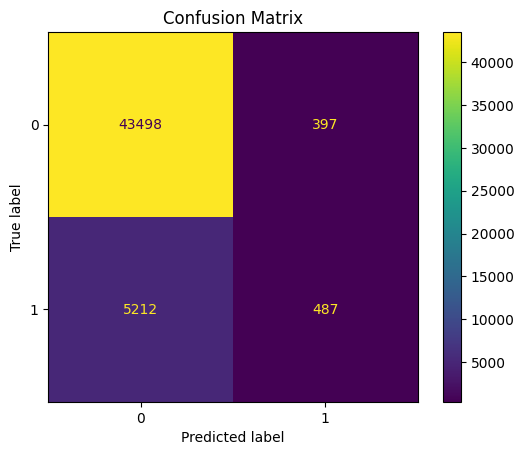

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Specify the labels (0, 1) or use your specific classes
disp.plot()

# Show the plot
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     43895
         1.0       0.55      0.09      0.15      5699

    accuracy                           0.89     49594
   macro avg       0.72      0.54      0.54     49594
weighted avg       0.85      0.89      0.85     49594



**So, we are getting approximately 89% accuracy**